# Análisis gráfico
- Visualización de Datos
- Exploramos visualmente el dataset normalizado (`zscore_normalized_all.csv`)
- Los gráficos seleccionados ayudan a entender las distribuciones, relaciones y separabilidad de las características
- En el análisis original de 1995 se consideraron importantes las caracterísicas:
    - `f02` (mean texture)
    - `f24` (worst area)
    - `f25` (worst smoothness)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('..')  # Añade el directorio padre al path
from utils.config import FEATURE_NAMES

# Configuración para visualización
%matplotlib inline
plt.style.use('ggplot')

## Carga de datos

In [2]:
# Cargar el dataset normalizado
df = pd.read_csv('../data/processed/zscore_normalized_all.csv')
print("Primeras 5 filas del dataset normalizado:")
df.head()

Primeras 5 filas del dataset normalizado:


,diagnosis,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


## 1. Histograma superpuesto
- En inglés "Overlaid Histogram"
- Permite comparar varios histogramas en un mismo gráfico.
- Las tres características estudiadas están normalizadas
- Realizamos el histograma Mostramos las distribuciones de:
1. f02 (mean texture)
2. f24 (worst area)
3. f25 (worst smoothness)

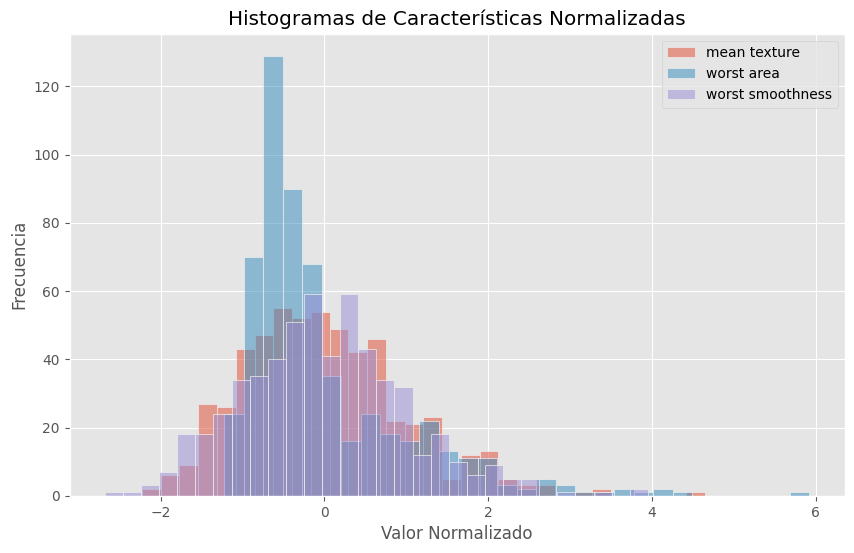

In [3]:
plt.figure(figsize=(10, 6))
for col in ['f02', 'f24', 'f25']:
    sns.histplot(df[col], label=FEATURE_NAMES[col], bins=30, alpha=0.5)
plt.title('Histogramas de Características Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Histograma de otras características
Elegimos otras tres características:
    - f01 (mean radius)
    - f04 (mean area)
    - f21 (worst radius)

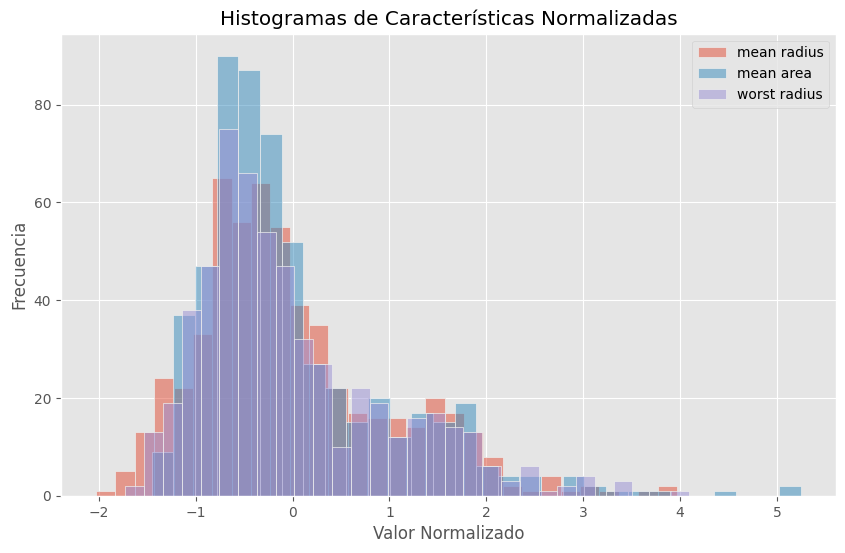

In [4]:
plt.figure(figsize=(10, 6))
for col in ['f01', 'f04', 'f21']:
    sns.histplot(df[col], label=FEATURE_NAMES[col], bins=30, alpha=0.5)
plt.title('Histogramas de Características Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

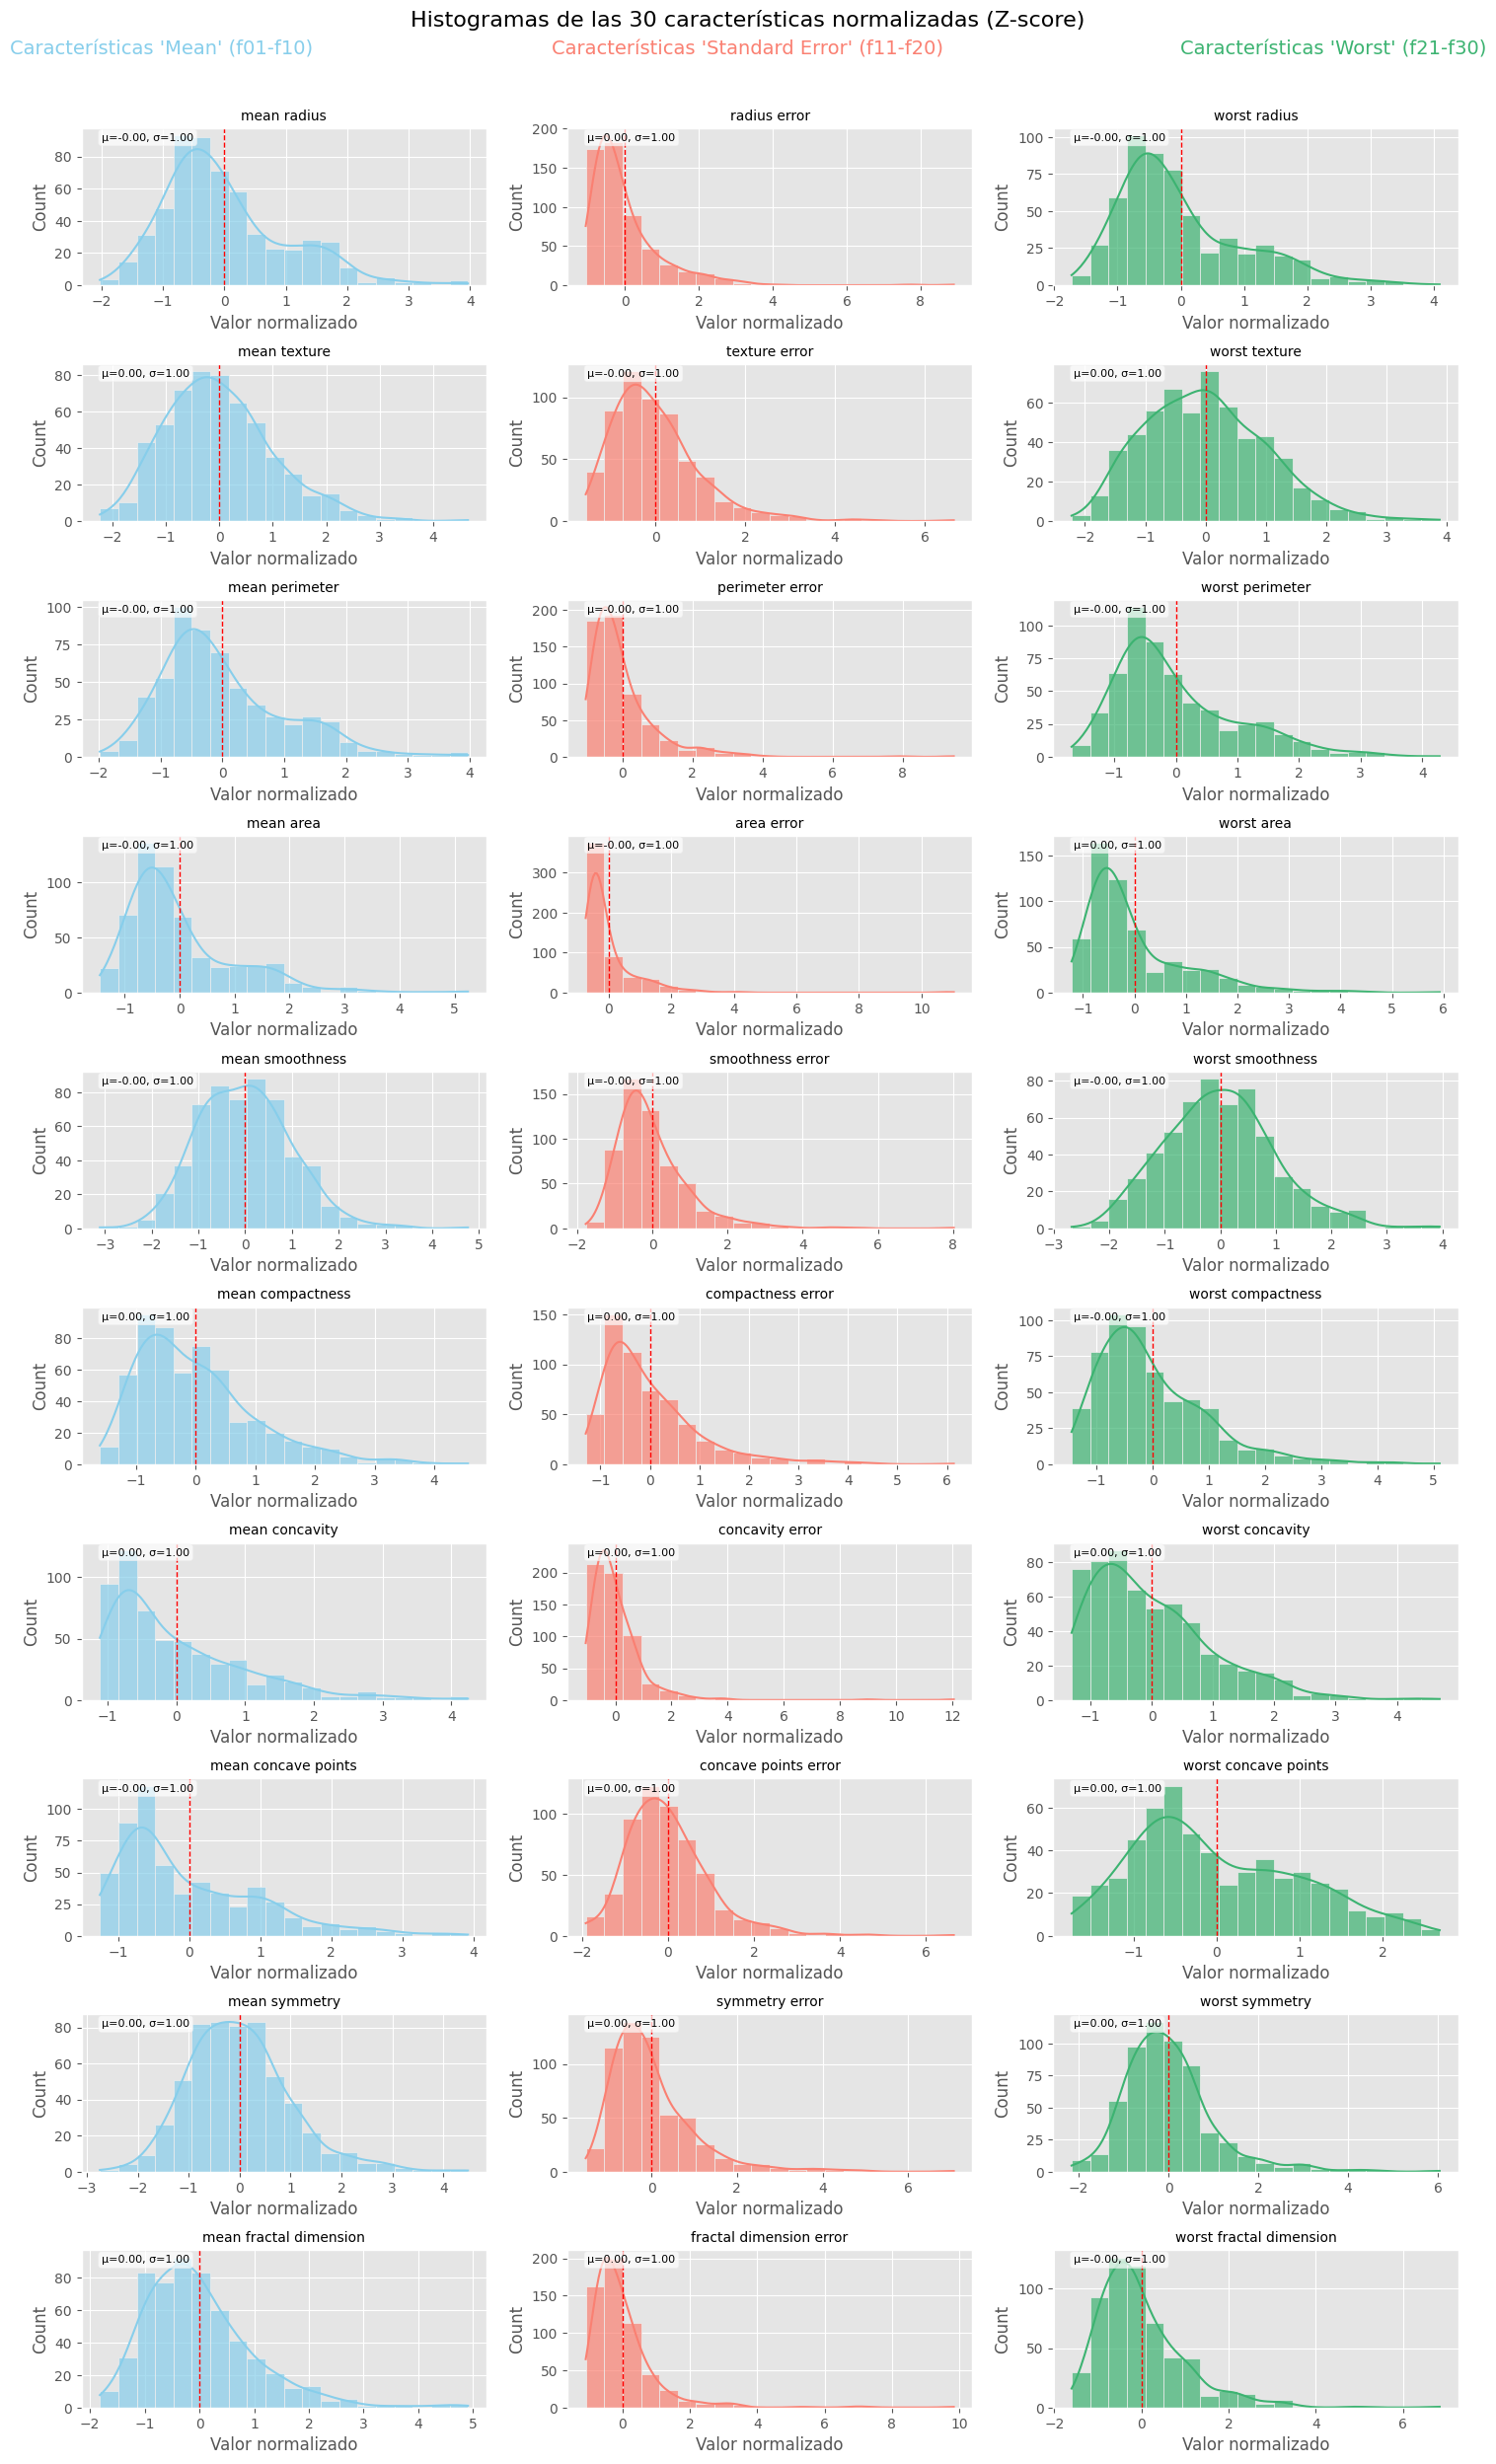

In [5]:
# Crear una figura con subplots en una cuadrícula de 10x3
fig, axes = plt.subplots(10, 3, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5)  # Aumentar el espacio entre filas

# Colores para cada tipo de característica
colors = {
    'mean': 'skyblue',
    'error': 'salmon',
    'worst': 'mediumseagreen'
}

# Generamos los histogramas
for i in range(10):
    for j in range(3):
        # Calcular el número de característica basado en la posición
        feature_num = i + 1 + j * 10
        feature_key = f'f{feature_num:02d}'
        
        # Determinar el tipo de característica (mean, error o worst)
        if feature_num <= 10:
            feature_type = 'mean'
        elif feature_num <= 20:
            feature_type = 'error'
        else:
            feature_type = 'worst'
        
        # Generar el histograma
        sns.histplot(
            df[feature_key], 
            ax=axes[i, j], 
            bins=20, 
            kde=True,
            color=colors[feature_type],
            alpha=0.7
        )
        
        # Agregar diagnóstico como color
        if False:  # Desactivado por ahora, quitar False para activar
            sns.histplot(
                x=df[feature_key],
                hue=df['diagnosis'],
                ax=axes[i, j],
                bins=20,
                palette=['lightblue', 'salmon'],
                alpha=0.5,
                multiple='dodge'
            )
        
        # Configurar título y etiquetas
        axes[i, j].set_title(f'{FEATURE_NAMES[feature_key]}', fontsize=10)
        axes[i, j].set_xlabel('Valor normalizado')
        
        # Añadir estadísticas
        mean = df[feature_key].mean()
        std = df[feature_key].std()
        axes[i, j].axvline(mean, color='red', linestyle='--', linewidth=1)
        
        # Añadir anotación con media y desviación estándar
        axes[i, j].annotate(f'μ={mean:.2f}, σ={std:.2f}', 
                        xy=(0.05, 0.92), 
                        xycoords='axes fraction',
                        fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

# Ajustar título principal
plt.suptitle('Histogramas de las 30 características normalizadas (Z-score)', 
             fontsize=16, y=0.92)

# Añadir subtítulos para cada columna
fig.text(0.17, 0.905, "Características 'Mean' (f01-f10)", ha='center', fontsize=14, color=colors['mean'])
fig.text(0.5, 0.905, "Características 'Standard Error' (f11-f20)", ha='center', fontsize=14, color=colors['error'])
fig.text(0.83, 0.905, "Características 'Worst' (f21-f30)", ha='center', fontsize=14, color=colors['worst'])

# Guardar la figura
plt.savefig('../output/figures/histograms_all_features.png', dpi=300, bbox_inches='tight')
plt.show()

### Análisis de los histogramas

- **Distribuciones bimodales**: Varias características muestran distribuciones con dos picos, lo que sugiere una separación natural entre tumores benignos y malignos. Esto es particularmente visible en características como f01 (mean radius), f04 (mean area), f07 (mean concavity), f08 (mean concave points), f21 (worst radius) y f24 (worst area).

- **Asimetría positiva**: La mayoría de las características de "error" (f11-f20) muestran una marcada asimetría positiva (cola hacia la derecha), indicando que hay casos atípicos con valores de error mucho mayores que la media.

- **Distribuciones de características "worst"**: Las características f21-f30 tienden a mostrar una separación más clara entre grupos, lo que sugiere que los valores extremos podrían ser más discriminativos para la clasificación.

#### Características destacables para la clasificación

1. **Radius, Area y Concave points**: Tanto en sus versiones "mean" (f01, f04, f08) como "worst" (f21, f24, f28), estas características muestran distribuciones claramente separadas, lo que las hace particularmente útiles para la clasificación de tumores. Estas características se relacionan con el tamaño y forma de las células.

2. **Texture**: f02 (mean texture) y f22 (worst texture) muestran distribuciones más cercanas a la normal, con cierta separación entre clases.

3. **Smoothness**: Particularmente f25 (worst smoothness) muestra potencial para separar clases.

4. **Características de error**: Aunque f11-f20 presentan distribuciones sesgadas, todavía pueden contener información valiosa sobre la variabilidad dentro de las muestras.

#### Características específicas con potencial discriminativo

- **f01/f04 (mean radius/area) y f21/f24 (worst radius/area)**: Presentan claras distribuciones bimodales que sugieren buena separabilidad entre clases.
- **f08 (mean concave points) y f28 (worst concave points)**: También muestran distribuciones que podrían separar bien las clases.
- **f07 (mean concavity) y f27 (worst concavity)**: Similares a los concave points, ofrecen buena separabilidad.
- **f06 (mean compactness) y f26 (worst compactness)**: Presentan también cierta bimodalidad útil para clasificación.